### Homework 5

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get("https://corgis-edu.github.io/corgis/csv/")
soup = BeautifulSoup(response.text, 'html.parser')
soup.find('h3')

<h3>Aids</h3>

In [3]:
import pandas as pd

def pdcorgis(a):
    lowera = a.lower()
    url = f"https://corgis-edu.github.io/corgis/csv/{lowera}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for attribute in soup.find_all("a", attrs={'download':True}):
        link = url + attribute['href']
        return pd.read_csv(link)            

In [4]:
classics = pdcorgis("Classics")
print(classics)

     bibliography.congress classifications bibliography.languages  \
0                                       PR                     en   
1                                       PS                     en   
2                                    PZ,PR                     en   
3                                       PR                     en   
4                                       PT                     en   
...                                    ...                    ...   
1001                                   NaN                     en   
1002                                   NaN                     en   
1003                                   NaN                     en   
1004                                   NaN                     en   
1005                                   NaN                     en   

                                  bibliography.subjects  \
0     Sisters -- Fiction,Courtship -- Fiction,Social...   
1     Mentally ill women -- Fiction,Feminist fiction.

<AxesSubplot:xlabel='artist.hotttnesss', ylabel='song.tempo'>

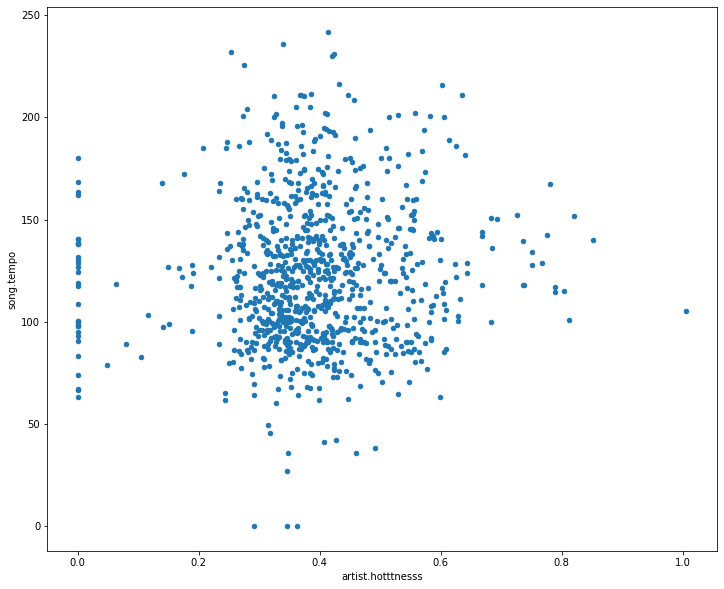

In [5]:
music = pdcorgis("Music")

musicplot = music.loc[0:900,['artist.hotttnesss', 'song.tempo']]

musicplot.plot(kind='scatter',
               x='artist.hotttnesss',
               y='song.tempo',
               figsize=(12,10))

<AxesSubplot:xlabel='Description'>

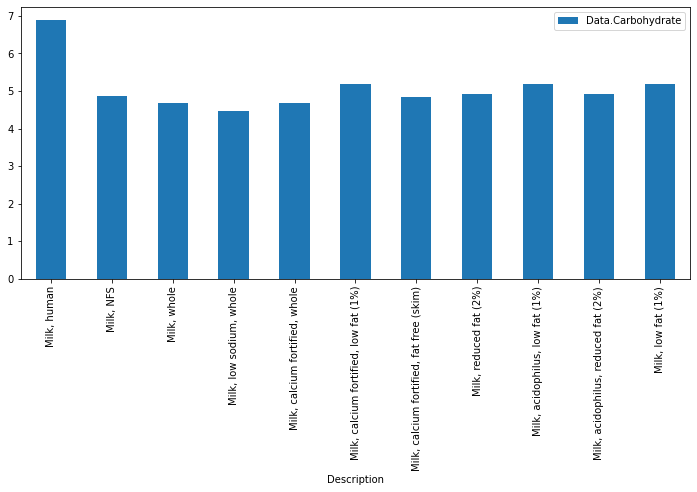

In [6]:
food = pdcorgis("Food")
foodplot = food.loc[0:10,['Description','Data.Carbohydrate']]

foodplot.plot(kind='bar',
             x='Description',
             y='Data.Carbohydrate',
             figsize=(12,5))

In [10]:
billionaires = pdcorgis("Billionaires")
billionaires.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


<AxesSubplot:ylabel='wealth.worth in billions'>

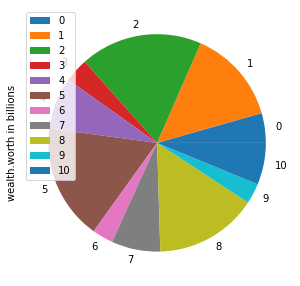

In [13]:
bplot = billionaires.loc[0:10,['company.founded', 'wealth.worth in billions']]

bplot.plot(kind='pie',
             x='company.founded',
             y='wealth.worth in billions',
             figsize=(12,5))